<a href="https://colab.research.google.com/github/Nuclei-7/FirstMachineLearningModel/blob/main/HandwrittenGovind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetching Dataset

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Fetch the dataset

In [ ]:

mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

# Example digit

In [ ]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # Reshape to plot it

# Display the digit

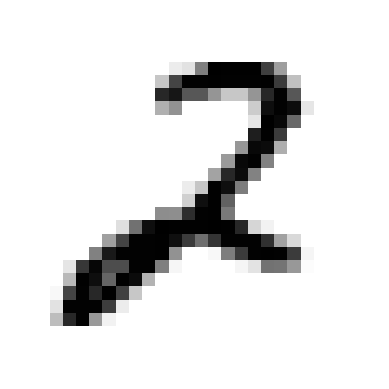

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()


# Split the dataset into training and test sets

In [ ]:
x_train, x_test = x[:60000].to_numpy(), x[60000:70000].to_numpy()  # Convert to NumPy arrays
y_train, y_test = y[:60000].to_numpy(), y[60000:70000].to_numpy()  # Convert to NumPy arrays

# Shuffle the training set

In [ ]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2-detector (binary classifier for digit 2)

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)  # Compare with integer 2
y_test_2 = (y_test == 2)


# Train a logistic regression classifier

In [ ]:
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print("Prediction for the example digit:", example)

Prediction for the example digit: [ True]


# Cross Validation

In [ ]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print("Cross-validation accuracy:", a.mean())

Cross-validation accuracy: 0.97935
